In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("C:\\Users\\akelo\\Desktop\\DATASETS\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [5]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [6]:
for c in categorical_columns:
    df[c] =df[c].str.lower().str.replace(' ', '_')

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges =df.totalcharges.fillna(0)

In [8]:
df.churn = (df.churn == 'yes').astype(int)

In [9]:
df_full_train,df_test = train_test_split(df,test_size = 0.2,random_state = 1)
df_train,df_val =train_test_split(df_full_train,test_size = 0.25,random_state = 1)

In [10]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [11]:
y_train =df_train.churn.values
y_val = df_val.churn.values
y_test =df_test.churn.values

In [12]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [13]:
numerical = ['tenure', 'monthlycharges','totalcharges']
categorical = ['gender', 'seniorcitizen','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod']

In [14]:
dv = DictVectorizer(sparse = False)

In [15]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')

In [16]:
x_train = dv.fit_transform(train_dict)

In [17]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [18]:
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
x_val = dv.transform(val_dict)

In [19]:
y_pred = model.predict_proba(x_val)[:,1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8055358410220014)

In [20]:
len(y_val)

1409

In [21]:
(y_val == churn_decision).sum().astype(int)

np.int64(1135)

In [22]:
1135/1409

0.8055358410220014

In [23]:
(y_val == churn_decision).mean()

np.float64(0.8055358410220014)

In [24]:
threshold = np.linspace(0,1,21)
threshold

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [25]:
scores = []
for t in threshold:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.508
0.10 0.605
0.15 0.664
0.20 0.705
0.25 0.738
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.793
0.50 0.806
0.55 0.804
0.60 0.800
0.65 0.787
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


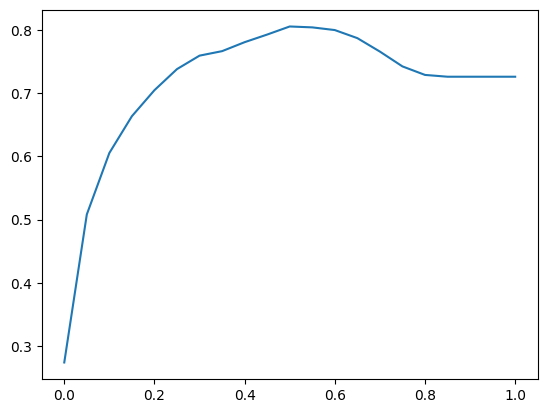

In [26]:
plt.plot(threshold,scores)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
thresholds = np.linspace(0,1,21)
scores = []

In [29]:
for t in threshold:
    score = accuracy_score(y_val,y_pred >= t)
    print('%.2f %.3f'%(t,score))
    scores.append(score)

0.00 0.274
0.05 0.508
0.10 0.605
0.15 0.664
0.20 0.705
0.25 0.738
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.793
0.50 0.806
0.55 0.804
0.60 0.800
0.65 0.787
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [30]:
from collections import Counter

In [31]:
Counter (y_pred >= 1.0)

Counter({np.False_: 1409})

In [32]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [33]:
1023/1409

0.7260468417317246

In [34]:
y_val.mean()

np.float64(0.2739531582682754)

In [35]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [36]:
#people who are going to churn
actual_positive = (y_val == 1)
#people who are not going to churn
actual_negative = (y_val == 0)

In [37]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative =(y_pred < t)

In [38]:
tp = (predict_positive & actual_positive).sum()
tp

np.int64(212)

In [39]:
tn = (predict_negative & actual_negative).sum()
tn

np.int64(923)

In [40]:
fp = (predict_positive & actual_negative).sum()
fp

np.int64(100)

In [41]:
fn = (predict_negative & actual_positive).sum()
fn

np.int64(174)

In [42]:
confusion_matrix = np.array([[tn,fp],
                            [fn,tp]
                            ])
confusion_matrix

array([[923, 100],
       [174, 212]])

In [43]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.66, 0.07],
       [0.12, 0.15]])

In [44]:
accuracy = (tp + tn)/(tp + tn + fp + fn)
accuracy

np.float64(0.8055358410220014)

In [45]:
precision = tp / (tp + fp)
precision

np.float64(0.6794871794871795)

In [46]:
recall = tp / (tp + fn)
recall

np.float64(0.5492227979274611)

In [47]:
tp + fp

np.int64(312)

In [48]:
tp + fn

np.int64(386)

In [49]:
tp

np.int64(212)

In [50]:
fp

np.int64(100)

In [51]:
tpr = tp /(tp + fn)
tpr

np.float64(0.5492227979274611)

In [52]:
fpr = fp/(fp + tn)
fpr

np.float64(0.09775171065493646)

In [53]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()

    scores.append((t, tp, tn, fp, fn))
    
scores

[(np.float64(0.0), np.int64(386), np.int64(0), np.int64(1023), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(122), np.int64(901), np.int64(1)),
 (np.float64(0.02), np.int64(383), np.int64(215), np.int64(808), np.int64(3)),
 (np.float64(0.03), np.int64(382), np.int64(270), np.int64(753), np.int64(4)),
 (np.float64(0.04), np.int64(382), np.int64(309), np.int64(714), np.int64(4)),
 (np.float64(0.05), np.int64(379), np.int64(337), np.int64(686), np.int64(7)),
 (np.float64(0.06), np.int64(377), np.int64(367), np.int64(656), np.int64(9)),
 (np.float64(0.07), np.int64(375), np.int64(394), np.int64(629), np.int64(11)),
 (np.float64(0.08), np.int64(370), np.int64(427), np.int64(596), np.int64(16)),
 (np.float64(0.09), np.int64(370), np.int64(457), np.int64(566), np.int64(16)),
 (np.float64(0.1), np.int64(367), np.int64(486), np.int64(537), np.int64(19)),
 (np.float64(0.11), np.int64(364), np.int64(505), np.int64(518), np.int64(22)),
 (np.float64(0.12), np.int64(363), np.int64(527), 

In [54]:
columns = ['threshold','tp','tn','fp','fn']
df_scores = pd.DataFrame(scores,columns = columns)
df_scores

,threshold,tp,tn,fp,fn
0,0.00,386,0,1023,0
1,0.01,385,122,901,1
2,0.02,383,215,808,3
3,0.03,382,270,753,4
4,0.04,382,309,714,4
...,...,...,...,...,...
96,0.96,0,1023,0,386
97,0.97,0,1023,0,386
98,0.98,0,1023,0,386
99,0.99,0,1023,0,386


In [55]:
df_scores[::10]

,threshold,tp,tn,fp,fn
0,0.0,386,0,1023,0
10,0.1,367,486,537,19
20,0.2,337,656,367,49
30,0.3,292,778,245,94
40,0.4,252,848,175,134
50,0.5,212,923,100,174
60,0.6,155,972,51,231
70,0.7,69,1010,13,317
80,0.8,4,1023,0,382
90,0.9,0,1023,0,386


In [56]:
df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)
df_scores[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,367,486,537,19,0.950777,0.524927
20,0.2,337,656,367,49,0.873057,0.358749
30,0.3,292,778,245,94,0.756477,0.239492
40,0.4,252,848,175,134,0.652850,0.171065
50,0.5,212,923,100,174,0.549223,0.097752
60,0.6,155,972,51,231,0.401554,0.049853
70,0.7,69,1010,13,317,0.178756,0.012708
80,0.8,4,1023,0,382,0.010363,0.000000
90,0.9,0,1023,0,386,0.000000,0.000000


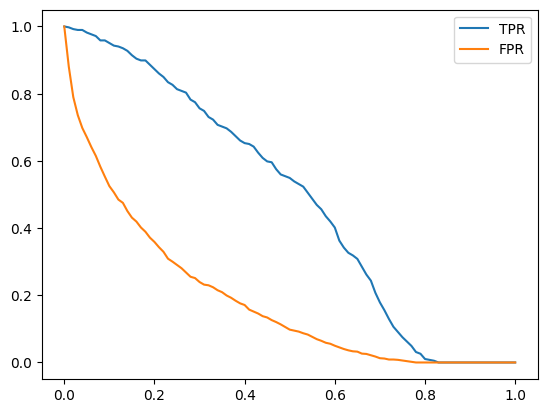

In [57]:
plt.plot(df_scores.threshold,df_scores['tpr'],label = 'TPR')
plt.plot(df_scores.threshold,df_scores['fpr'],label = 'FPR')
plt.legend()

In [58]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size = len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089], shape=(1409,))

In [59]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [60]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
 
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
 
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
 
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
 
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
 
        scores.append((t, tp, tn, fp, fn))
 
    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
 
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
 
    return df_scores


In [61]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


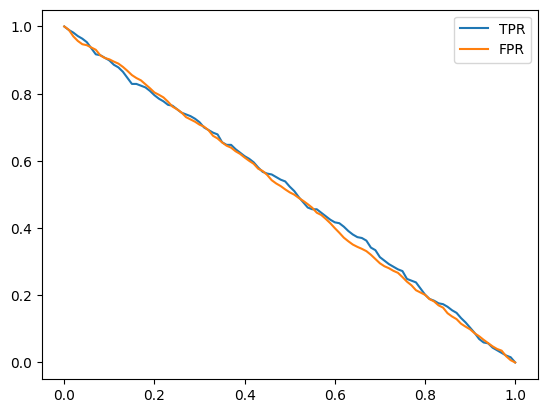

In [62]:
plt.plot(df_rand.threshold,df_rand['tpr'],label ='TPR')
plt.plot(df_rand.threshold,df_rand['fpr'],label = 'FPR')

plt.legend()

In [63]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg,num_pos

(np.int64(1023), np.int64(386))

In [64]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [65]:
y_ideal_pred = np.linspace(0,1,len(y_ideal))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [66]:
1-y_val.mean()

np.float64(0.7260468417317246)

In [67]:
accuracy_ideal =((y_ideal_pred >= 0.726) == y_ideal).mean()
accuracy_ideal

np.float64(1.0)

In [68]:
df_ideal = tpr_fpr_dataframe(y_ideal,y_ideal_pred)
df_ideal[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,386,141,882,0,1.000000,0.862170
20,0.2,386,282,741,0,1.000000,0.724340
30,0.3,386,423,600,0,1.000000,0.586510
40,0.4,386,564,459,0,1.000000,0.448680
50,0.5,386,704,319,0,1.000000,0.311828
60,0.6,386,845,178,0,1.000000,0.173998
70,0.7,386,986,37,0,1.000000,0.036168
80,0.8,282,1023,0,104,0.730570,0.000000
90,0.9,141,1023,0,245,0.365285,0.000000


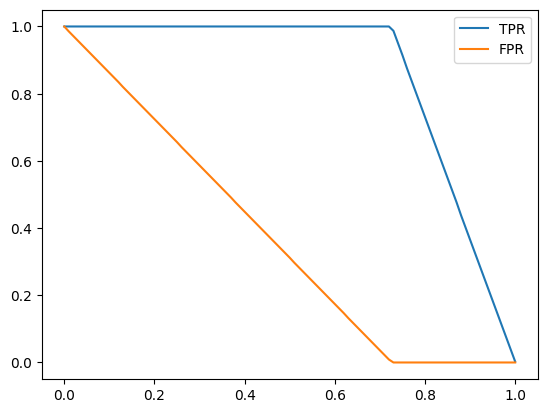

In [69]:
plt.plot(df_ideal.threshold,df_ideal['tpr'],label = 'TPR')
plt.plot(df_ideal.threshold,df_ideal['fpr'],label = 'FPR')
plt.legend()

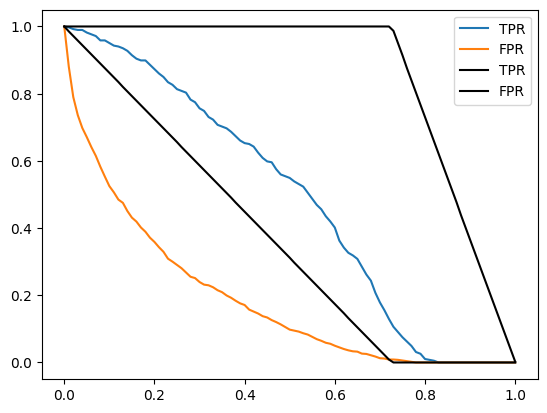

In [70]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
 
#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
 
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color = 'black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color = 'black')
 
plt.legend()

In [71]:
print(df_scores.columns)

Index(['threshold', 'tp', 'tn', 'fp', 'fn', 'tpr', 'fpr'], dtype='object')


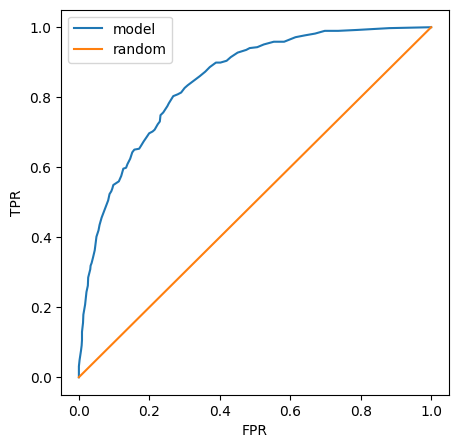

In [72]:
plt.figure(figsize=(5,5))
 
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

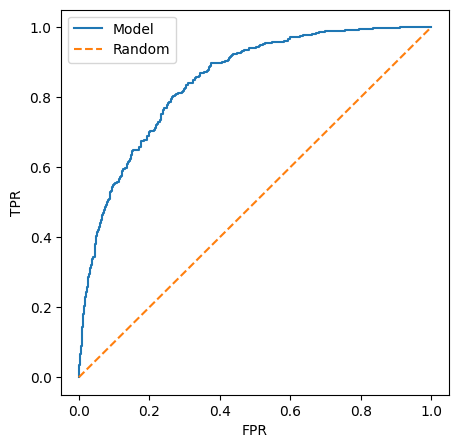

In [73]:
# We can also use the ROC functionality of scikit learn package
from sklearn.metrics import roc_curve
 
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
 
plt.figure(figsize=(5,5))
 
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label='Random', linestyle='--')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

In [74]:
from sklearn.metrics import auc
#auc needs values for x axis amd y-axis
auc(fpr,tpr)

0.8465956573929162

In [75]:
auc(df_scores.fpr,df_scores.tpr)

0.8463208889834327

In [76]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999430203759136

In [77]:
fpr,tpr,thresholds = roc_curve(y_val,y_pred)
auc(fpr,tpr)

0.8465956573929162

In [78]:
#shortcut using sklearn metrics to implment the auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.8465956573929162

In [79]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [80]:
import random 
pos_ind = random.randint(0,len(pos)-1)
neg_ind = random.randint(0,len(neg)-1)

In [81]:
# now we want to compare the  score of  this positive example with the score of this negative example
pos[pos_ind] > neg[neg_ind]

np.True_

In [82]:
#so for this previous random example the result is true. Now we want to do the very same thing with 100000 times and evaluate the perfomance
n = 100000
success = 0

for i in range(n):
    pos_ind =  random.randint(0,len(pos)-1)
    neg_ind =  random.randint(0,len(neg)-1)

    if pos[pos_ind] > neg[neg_ind]:
        success += 1
        
success / n


0.84595

In [83]:
#implementation via numpy
n = 50000
np.random.seed(1)
pos_ind = np.random.randint(0,len(pos),size = n)
neg_ind = np.random.randint(0,len(neg),size = n)
pos[pos_ind] > neg[neg_ind]

array([ True, False,  True, ..., False,  True,  True], shape=(50000,))

In [84]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84892)

In [85]:
#making of train function
def train(df_train,y_train):
 dicts = df_train[categorical + numerical].to_dict(orient = 'records')
 dv = DictVectorizer(sparse = False)
 X_train = dv.fit_transform(dicts)


 model = LogisticRegression(solver ='liblinear', max_iter = 1000)
 model.fit(x_train,y_train)
  
 return dv,model
#def train(df_train, y_train):
    #dicts = df_train.to_dict(orient='records')
#x_train = dv.fit_transform(dicts)
   # model = LogisticRegression()
   # model.fit(x_train, y_train)
    #return dv, model

In [86]:
dv,model = train(df_train,y_train)

In [87]:
#making of predict function
def predict (df,dv,model):
    dicts = df[categorical + numerical].to_dict(orient = 'records')
    
    x = dv.fit_transform(dicts)
    y_pred = model.predict_proba(x)[:,1]
    return y_pred   

In [88]:
df_train = df_train.dropna()  # or any filtering
y_train = df_train.churn.values

AttributeError: 'DataFrame' object has no attribute 'churn'

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

In [95]:
y_pred = predict(df_val,dv,model)
y_pred

array([0.04568161, 0.14641596, 0.22564556, ..., 0.54976364, 0.01013932,
       0.77352178], shape=(1127,))

In [96]:
#implementation of k-fold cross validation
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1) 
 
kfold.split(df_full_train)

<generator object _BaseKFold.split at 0x00000251F9A93BC0>

In [97]:
train_idx, val_idx = next(kfold.split(df_full_train))
len(train_idx), len(val_idx)

(5070, 564)

In [98]:
len(df_full_train)

5634

In [99]:
# We can use iloc to select a part of this dataframe
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [106]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

Kfold = KFold(n_splits = 10,shuffle = True,random_state = 1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
 
    y_train = df_train.churn.values
    y_val = df_val.churn.values
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
 
scores
# Output: 
# [0.8479398247539081,
# 0.8410581683168317,
# 0.8557214756739697,
# 0.8333552794008724,
# 0.8262717121588089,
# 0.8342657342657342,
# 0.8412569195701727,
# 0.8186669829222013,
# 0.8452349192233585,
# 0.8621054754462034]

C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

[0.8446279564490428,
 0.8451633061846113,
 0.8334256472004816,
 0.8347728944170877,
 0.8516323617081358]

In [107]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))
# Output: 0.841 +- 0.012

0.842 +- 0.007


In [108]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
 
    return dv, model

In [109]:
dv, model = train(df_train, y_train, C=0.001)

In [110]:
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1)  
 
for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
     
    scores = []
 
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
 
        y_train = df_train.churn.values
        y_val = df_val.churn.values
 
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
 
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
 
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
 
# Output:
# C=0.001 0.826 +- 0.012
# C=0.01 0.840 +- 0.012
# C=0.1 0.841 +- 0.011
# C=0.5 0.841 +- 0.011
# C=1 0.840 +- 0.012
# C=5 0.841 +- 0.012
# C=10 0.841 +- 0.012

C=0.001 0.826 +- 0.012


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=0.01 0.841 +- 0.012


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=0.1 0.842 +- 0.012


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=0.5 0.843 +- 0.012


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=1 0.843 +- 0.012


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=5 0.843 +- 0.012


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=10 0.843 +- 0.012


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
from sklearn.model_selection import KFold
from tqdm import tqdm
 
n_splits = 5
 
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):   
    scores = []
 
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)  
 
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
 
        y_train = df_train.churn.values
        y_val = df_val.churn.values
 
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
 
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
 
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
 
# Output:
#  14%|█▍        | 1/7 [00:01<00:06,  1.03s/it]
# C=0.001 0.825 +- 0.009
# 29%|██▊       | 2/7 [00:02<00:05,  1.07s/it]
# C=0.01 0.840 +- 0.009
# 43%|████▎     | 3/7 [00:03<00:04,  1.06s/it]
# C=0.1 0.840 +- 0.008
# 57%|█████▋    | 4/7 [00:04<00:03,  1.08s/it]
# C=0.5 0.841 +- 0.006
# 71%|███████▏  | 5/7 [00:05<00:02,  1.13s/it]
# C=1 0.841 +- 0.008
# 86%|████████▌ | 6/7 [00:06<00:01,  1.15s/it]
# C=5 0.841 +- 0.007
# 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]
# C=10 0.841 +- 0.008


 14%|████████████▍                                                                          | 1/7 [00:03<00:21,  3.63s/it]

C=0.001 0.825 +- 0.009


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=0.01 0.840 +- 0.008


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=0.1 0.842 +- 0.007


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=0.5 0.842 +- 0.007


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=1 0.842 +- 0.007


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=5 0.842 +- 0.007


C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

C=10 0.842 +- 0.007


In [105]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)
 
auc = roc_auc_score(y_test, y_pred)
auc
# Output: 0.8572386167896259

C:\Users\akelo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8583327916626041